### Import Libraries

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix``
from sklearn.cluster import KMeans

### Menampilkan Dataset

In [19]:
df = pd.read_csv('./Data.csv')
df.head(5)

,Nama,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135
0,Kapal Api,1260,268,544,1838,206,1275,323,1338,246
1,Kapal Api,1253,264,543,1833,213,1273,322,1334,248
2,Kapal Api,1265,265,541,1828,202,1276,315,1334,246
3,Kapal Api,1260,267,551,1831,206,1272,321,1330,240
4,Kapal Api,1265,265,548,1829,205,1267,321,1333,245


### Data Asesmen

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    2005 non-null   object
 1   MQ2     2005 non-null   int64 
 2   MQ3     2005 non-null   int64 
 3   MQ4     2005 non-null   int64 
 4   MQ5     2005 non-null   int64 
 5   MQ6     2005 non-null   int64 
 6   MQ7     2005 non-null   int64 
 7   MQ8     2005 non-null   int64 
 8   MQ9     2005 non-null   int64 
 9   MQ135   2005 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 156.8+ KB


In [21]:
df.describe()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,1875.185536,610.309726,492.742145,1983.683791,251.164090,2176.551621,1091.933167,1278.393516,221.628928
std,640.692698,296.488729,57.406696,274.115565,56.180619,828.358102,802.204683,184.620118,22.635640
min,946.000000,236.000000,375.000000,1559.000000,148.000000,1250.000000,274.000000,993.000000,156.000000
25%,1348.000000,352.000000,451.000000,1771.000000,207.000000,1528.000000,387.000000,1134.000000,215.000000
50%,1701.000000,552.000000,496.000000,1868.000000,244.000000,1711.000000,842.000000,1236.000000,226.000000
75%,2520.000000,836.000000,541.000000,2241.000000,302.000000,2996.000000,1922.000000,1373.000000,236.000000
max,3026.000000,1216.000000,604.000000,2478.000000,374.000000,3777.000000,2638.000000,1676.000000,273.000000


### Visualisasi Awal

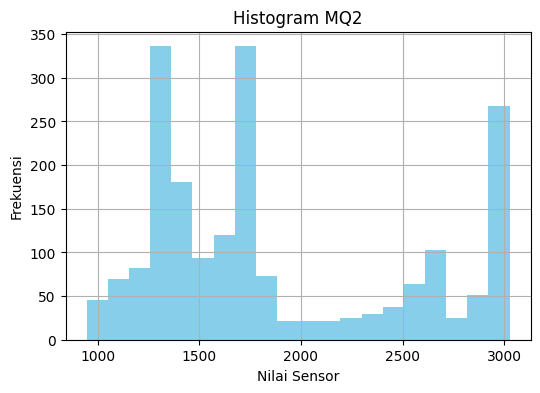

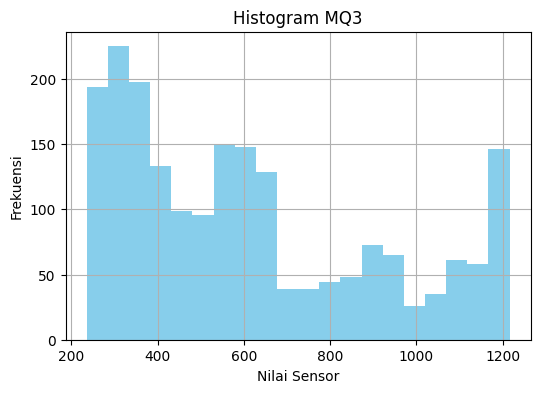

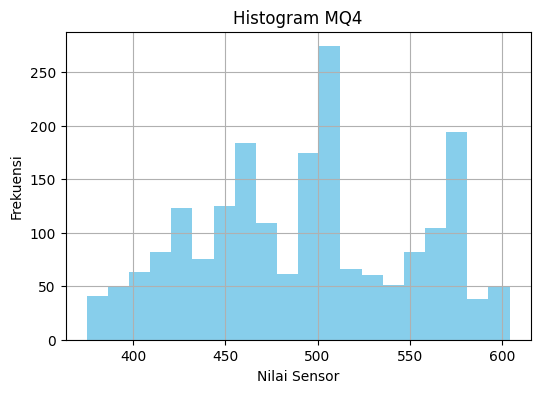

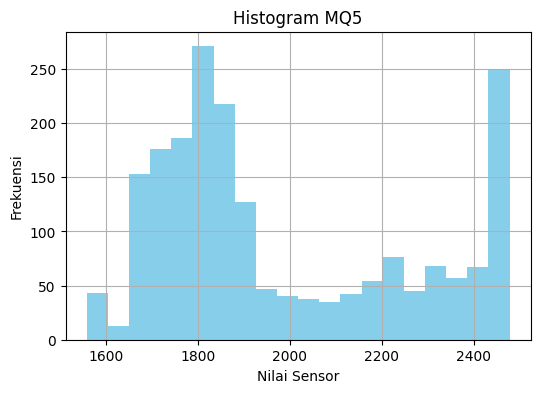

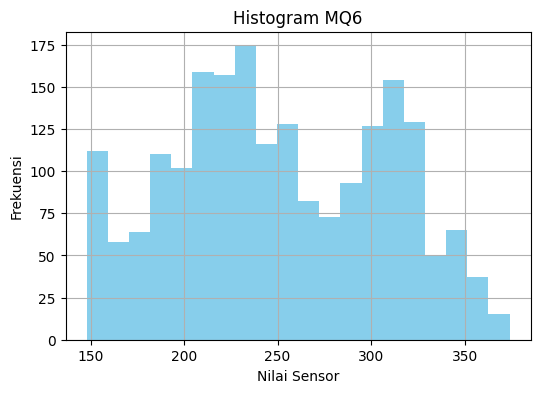

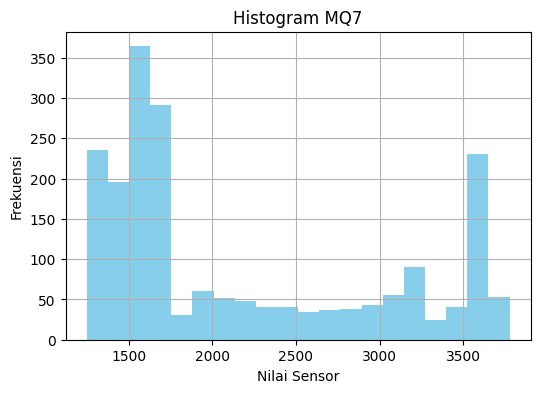

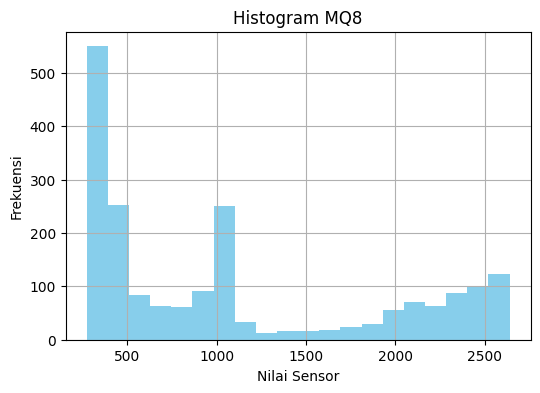

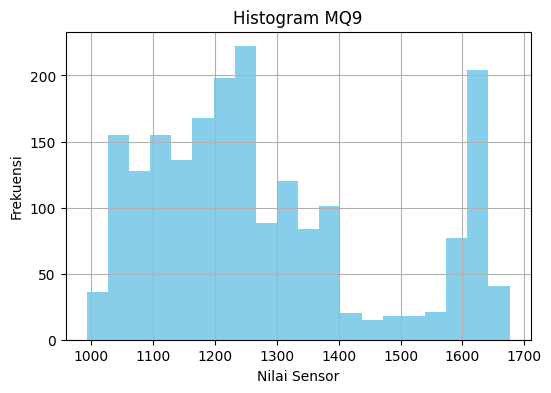

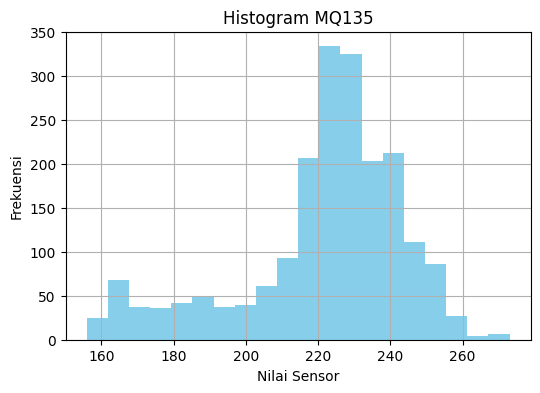

In [22]:
# Histogram untuk setiap sensor
sensor_columns = ['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ9', 'MQ135']
for sensor in sensor_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[sensor], bins=20, color='skyblue')
    plt.title(f'Histogram {sensor}')
    plt.xlabel('Nilai Sensor')
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

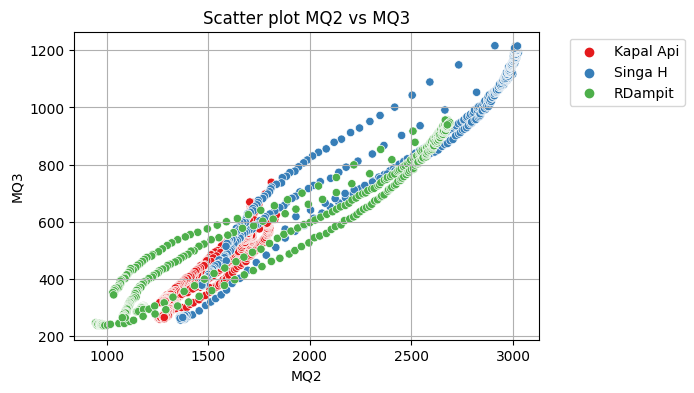

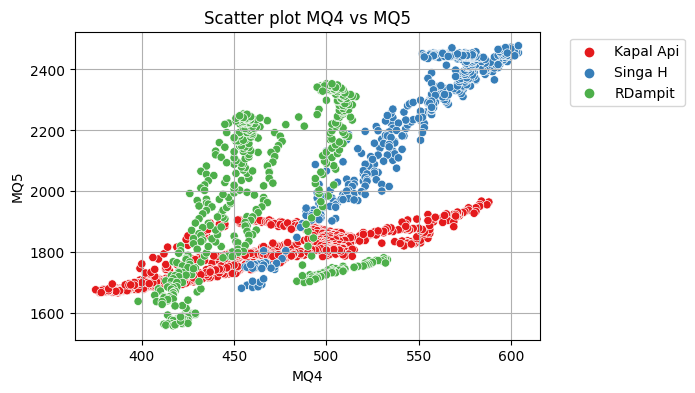

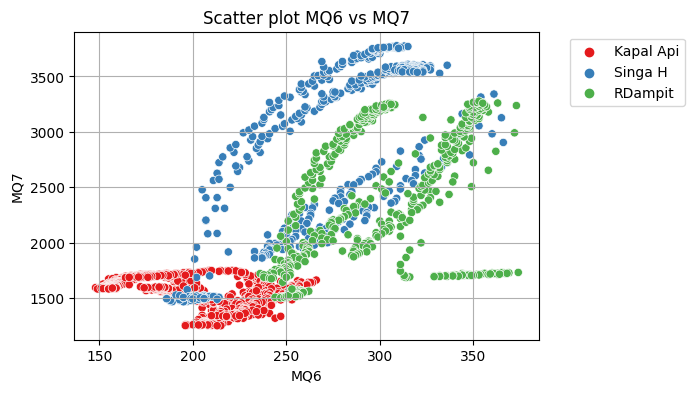

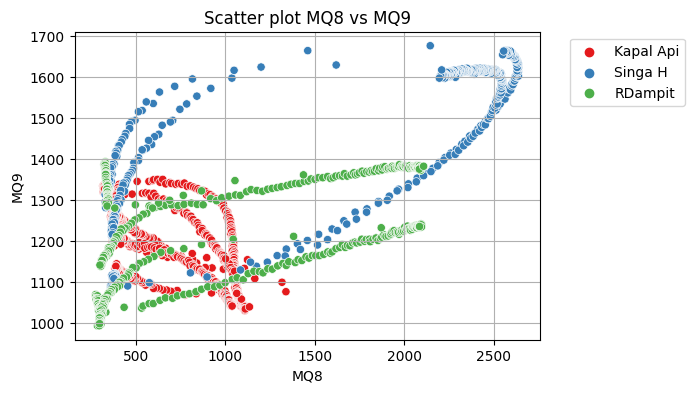

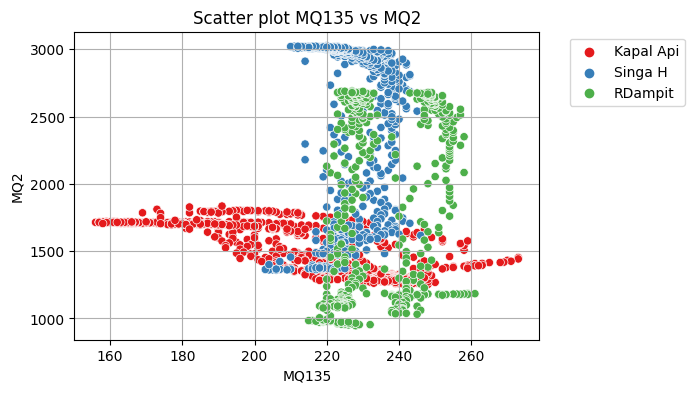

In [23]:
# Scatter plot untuk pasangan sensor
sensor_pairs = [('MQ2', 'MQ3'), ('MQ4', 'MQ5'), ('MQ6', 'MQ7'), ('MQ8', 'MQ9'), ('MQ135', 'MQ2')]

for pair in sensor_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue='Nama', palette='Set1')
    plt.title(f'Scatter plot {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

### Clustering Analysis

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


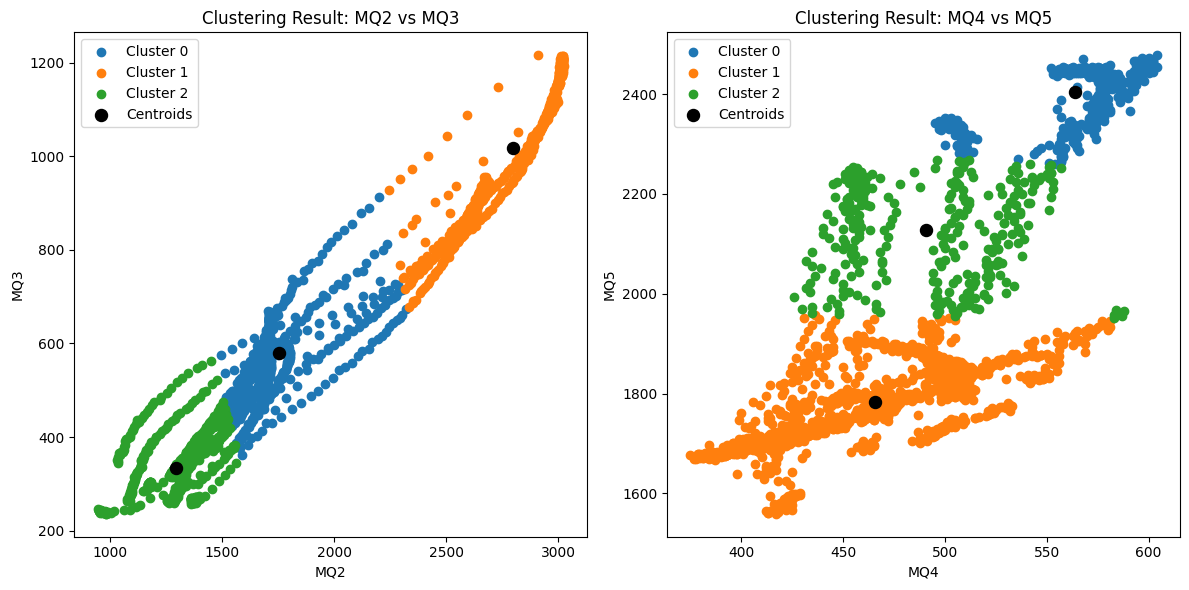

In [24]:
# Pilih fitur untuk clustering
features_1 = df[['MQ2', 'MQ3']]
features_2 = df[['MQ4', 'MQ5']]

# Menentukan jumlah cluster yang diinginkan
num_clusters = 3

# Melakukan K-Means Clustering untuk fitur pertama (MQ2 vs MQ3)
kmeans_1 = KMeans(n_clusters=num_clusters)
kmeans_1.fit(features_1)
df['Cluster_1'] = kmeans_1.labels_

# Melakukan K-Means Clustering untuk fitur kedua (MQ4 vs MQ5)
kmeans_2 = KMeans(n_clusters=num_clusters)
kmeans_2.fit(features_2)
df['Cluster_2'] = kmeans_2.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))

# Plot MQ2 vs MQ3
plt.subplot(1, 2, 1)
for i in range(num_clusters):
    cluster_data = df[df['Cluster_1'] == i]
    plt.scatter(cluster_data['MQ2'], cluster_data['MQ3'], label=f'Cluster {i}')
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s=300, c='black', marker='.', label='Centroids')
plt.xlabel('MQ2')
plt.ylabel('MQ3')
plt.title('Clustering Result: MQ2 vs MQ3')
plt.legend()

# Plot MQ4 vs MQ5
plt.subplot(1, 2, 2)
for i in range(num_clusters):
    cluster_data = df[df['Cluster_2'] == i]
    plt.scatter(cluster_data['MQ4'], cluster_data['MQ5'], label=f'Cluster {i}')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='black', marker='.', label='Centroids')
plt.xlabel('MQ4')
plt.ylabel('MQ5')
plt.title('Clustering Result: MQ4 vs MQ5')
plt.legend()

plt.tight_layout()
plt.show()


### Klasifikasi ANN

In [25]:
# Encoding label kategori 'Nama'
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Nama'])

# Memisahkan fitur dan label
X = df.drop(['Nama', 'Label'], axis=1)
y = df['Label']

# Pembagian dataset menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model jaringan syaraf tiruan
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Output layer dengan 4 neuron sesuai jumlah kategori
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Pelatihan model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")


Epoch 1/15
51/51 [==============================] - 1s 5ms/step - loss: 85.2284 - accuracy: 0.6384 - val_loss: 3.8730 - val_accuracy: 0.7855
Epoch 2/15
51/51 [==============================] - 0s 2ms/step - loss: 1.0813 - accuracy: 0.9308 - val_loss: 1.2841 - val_accuracy: 0.9052
Epoch 3/15
51/51 [==============================] - 0s 2ms/step - loss: 0.8988 - accuracy: 0.9395 - val_loss: 0.2236 - val_accuracy: 0.9850
Epoch 4/15
51/51 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9751 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 5/15
51/51 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9738 - val_loss: 0.1040 - val_accuracy: 0.9751
Epoch 6/15
51/51 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9913 - val_loss: 0.0412 - val_accuracy: 0.9925
Epoch 7/15
51/51 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9882 - val_loss: 0.0546 - val_accuracy: 0.9975
Epoch 8/15
51/51 [=

In [26]:
print(X_train.columns)

Index(['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ9', 'MQ135',
       'Cluster_1', 'Cluster_2'],
      dtype='object')


In [27]:
# Contoh data baru untuk pengklasifikasian
new_data = {
    'MQ2': [1260, 2659],
    'MQ3': [268, 900],
    'MQ4': [544, 450],
    'MQ5': [1838, 1500],
    'MQ6': [206, 2800],
    'MQ7': [1275, 300],
    'MQ8': [323, 2000],
    'MQ9': [1338, 3000],
    'MQ135': [246, 1000],
    'Cluster_1': [0, 0],
    'Cluster_2': [0, 0]
}

# Membuat DataFrame dari data baru
new_df = pd.DataFrame(new_data)

# Menyesuaikan kolom-kolom agar sesuai dengan X_train
new_df = new_df[X_train.columns]

# Melakukan prediksi dengan model yang sudah dilatih
new_predictions = model.predict(new_df)

# Melakukan dekode terhadap prediksi
new_predicted_classes = new_predictions.argmax(axis=1)
decoded_predictions = label_encoder.inverse_transform(new_predicted_classes)

# Menampilkan hasil prediksi
for i, prediction in enumerate(decoded_predictions):
    print(f"Data {i+1} diprediksi sebagai: {prediction}")

1/1 [==============================] - 0s 19ms/step
Data 1 diprediksi sebagai: Kapal Api
Data 2 diprediksi sebagai: RDampit


In [28]:
# Memilih fitur untuk klasifikasi, misalnya 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6'
features = df[['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6']]
target = df['Nama']  # Kolom yang akan diprediksi

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Membuat model jaringan saraf tiruan (MLPClassifier)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)  # Jumlah neuron dalam hidden layers

# Melatih model
mlp_classifier.fit(X_train, y_train)

# Memprediksi kelas untuk data uji
predictions = mlp_classifier.predict(X_test)

# Evaluasi klasifikasi
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8104738154613467
Classification Report:
              precision    recall  f1-score   support

   Kapal Api       0.95      0.65      0.77       186
     RDampit       0.80      1.00      0.89        97
     Singa H       0.70      0.92      0.79       118

    accuracy                           0.81       401
   macro avg       0.82      0.85      0.82       401
weighted avg       0.84      0.81      0.81       401



In [29]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kelas jenis kopi menjadi bilangan bulat di data latih
y_train_encoded = label_encoder.fit_transform(y_train)

# Mengubah kelas jenis kopi menjadi bilangan bulat di data uji
y_test_encoded = label_encoder.transform(y_test)

# Inisialisasi model XGBoost
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42)

# Latih model pada data latih yang telah diencode
model.fit(X_train, y_train_encoded)

# Lakukan prediksi pada data uji yang telah diencode
predictions = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test_encoded, predictions)
print(f'Accuracy: {accuracy}')

# Tampilkan classification report dan confusion matrix
print(classification_report(y_test_encoded, predictions))
print(confusion_matrix(y_test_encoded, predictions))

Accuracy: 0.9975062344139651
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       186
           1       0.99      1.00      0.99        97
           2       1.00      1.00      1.00       118

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

[[185   1   0]
 [  0  97   0]
 [  0   0 118]]


In [32]:
# Inisialisasi model XGBoost dengan parameter yang sesuai
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42)

# Mengubah kelas jenis kopi menjadi bilangan bulat di data latih
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Melatih model pada data latih yang telah diencode
model.fit(X_train, y_train_encoded)

new_data = np.array([
    [1250, 260, 550, 1800, 200],   # Data baru untuk Kapal Api
    [1175, 300, 530, 1770, 360],   # Data baru untuk RDampit
    [1360, 270, 460, 1695, 195],   # Data baru untuk Singa H
    [1300, 280, 560, 1750, 210],   # Data baru untuk Kapal Api
    [1200, 290, 540, 1785, 350],   # Data baru untuk RDampit
    [1400, 250, 480, 1720, 190]    # Data baru untuk Singa H
])

# Lakukan prediksi untuk data baru
predictions = model.predict(new_data)

# Mengubah kembali prediksi menjadi label jenis kopi
predicted_labels = label_encoder.inverse_transform(predictions)

# Menampilkan hasil prediksi
for i, pred_label in enumerate(predicted_labels):
    print(f"Data {i+1}: Prediksi jenis kopi adalah {pred_label}")

Data 1: Prediksi jenis kopi adalah Kapal Api
Data 2: Prediksi jenis kopi adalah RDampit
Data 3: Prediksi jenis kopi adalah Singa H
Data 4: Prediksi jenis kopi adalah Kapal Api
Data 5: Prediksi jenis kopi adalah RDampit
Data 6: Prediksi jenis kopi adalah Singa H


In [31]:
# Mendapatkan nama-nama fitur yang digunakan dalam model
feature_names = model.get_booster().feature_names

# Menampilkan nama-nama fitur yang digunakan
print("Fitur yang digunakan dalam pelatihan model:")
print(feature_names)

# Mendapatkan tingkat pentingnya setiap fitur
feature_importance = model.feature_importances_

# Menampilkan tingkat pentingnya setiap fitur
for i, importance in enumerate(feature_importance):
    print(f"Fitur {i+1}: Tingkat Penting = {importance}")


Fitur yang digunakan dalam pelatihan model:
['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6']
Fitur 1: Tingkat Penting = 0.10261598229408264
Fitur 2: Tingkat Penting = 0.05667969584465027
Fitur 3: Tingkat Penting = 0.3716600835323334
Fitur 4: Tingkat Penting = 0.1449800282716751
Fitur 5: Tingkat Penting = 0.3240642845630646
